In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [15]:
def get_latest_csv_data(folder_path):
    # List all files in the given folder
    files = os.listdir(folder_path)
    
    # Filter out only CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Sort files in descending order (alphanumeric)
    csv_files.sort(reverse=True)
    
    # Get the first file in the sorted list
    latest_file = csv_files[0]
    
    # Construct the full file path
    file_path = os.path.join(folder_path, latest_file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    print("File: " + latest_file)
    
    return df

In [16]:
def get_csv_data(file_name):

    df = pd.read_csv(file_name)
    print("File: " + file_name)
    
    return df

In [80]:
def plot_histograms_(df, bin_count):
    fig, axs = plt.subplots(3, 2, figsize=(20, 18))  # Adjusted figure size for better visibility
    
    # Increase the size of titles and labels
    title_size = 18
    label_size = 14
    
    # Plot histograms with KDE
    sns.histplot(df['count'], bins=8, kde=True, ax=axs[0, 0], color='blue', discrete=True)
    axs[0, 0].set_title('required GPU count', fontsize=title_size)
    axs[0, 0].set_xlabel('GPU count', fontsize=label_size)
    axs[0, 0].set_ylabel('Frequency', fontsize=label_size)

    if not np.issubdtype(df['time_diff'].dtype, np.timedelta64):
        df['time_diff'] = pd.to_timedelta(df['time_diff'])
    df['time_diff_hours'] = df['time_diff'].dt.total_seconds() / 3600  # Convert to hours

    sns.histplot(df['time_diff_hours'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Job Walltime(Hours)', fontsize=title_size)
    axs[0, 1].set_xlabel('Hours', fontsize=label_size)
    axs[0, 1].set_ylabel('Frequency', fontsize=label_size)
    axs[0, 1].set_xlim(left=0)
    x_values = axs[0, 1].get_xticks()
    axs[0, 1].set_xticks(np.linspace(min(x_values), max(x_values), 60))
    axs[0, 1].tick_params(axis='x', rotation=60)
    
    
    sns.histplot(df['computing_load'], bins=5, kde=True, ax=axs[1, 0], color='red', discrete=True)
    axs[1, 0].set_title('Computing Load', fontsize=title_size)
    axs[1, 0].set_xlabel('Computing Load', fontsize=label_size)
    axs[1, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['gpu_utilization'], bins=bin_count, kde=True, ax=axs[1, 1], color='purple')
    axs[1, 1].set_title('GPU Utilization', fontsize=title_size)
    axs[1, 1].set_xlabel('GPU Utilization', fontsize=label_size)
    axs[1, 1].set_ylabel('Frequency', fontsize=label_size)

    sns.histplot(df['flavor'], bins=bin_count, kde=True, ax=axs[2, 0], color='orange')
    axs[2, 0].set_title('Flavor', fontsize=title_size)
    axs[2, 0].set_xlabel('Flavor', fontsize=label_size)
    axs[2, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['preemption'], bins=bin_count, kde=True, ax=axs[2, 1], color='brown')
    axs[2, 1].set_title('Preemption', fontsize=title_size)
    axs[2, 1].set_xlabel('Preemption', fontsize=label_size)
    axs[2, 1].set_ylabel('Frequency', fontsize=label_size)

    axs[2, 0].set_ylim(0, len(df))  # 110% of the total number of rows
    axs[2, 1].set_ylim(0, len(df))  # 110% of the total number of rows
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig("last_check.png")
    
    # Show plot
    plt.show()

File: job_flow_total(task,flavor,single)_neo_no_duplicate.csv


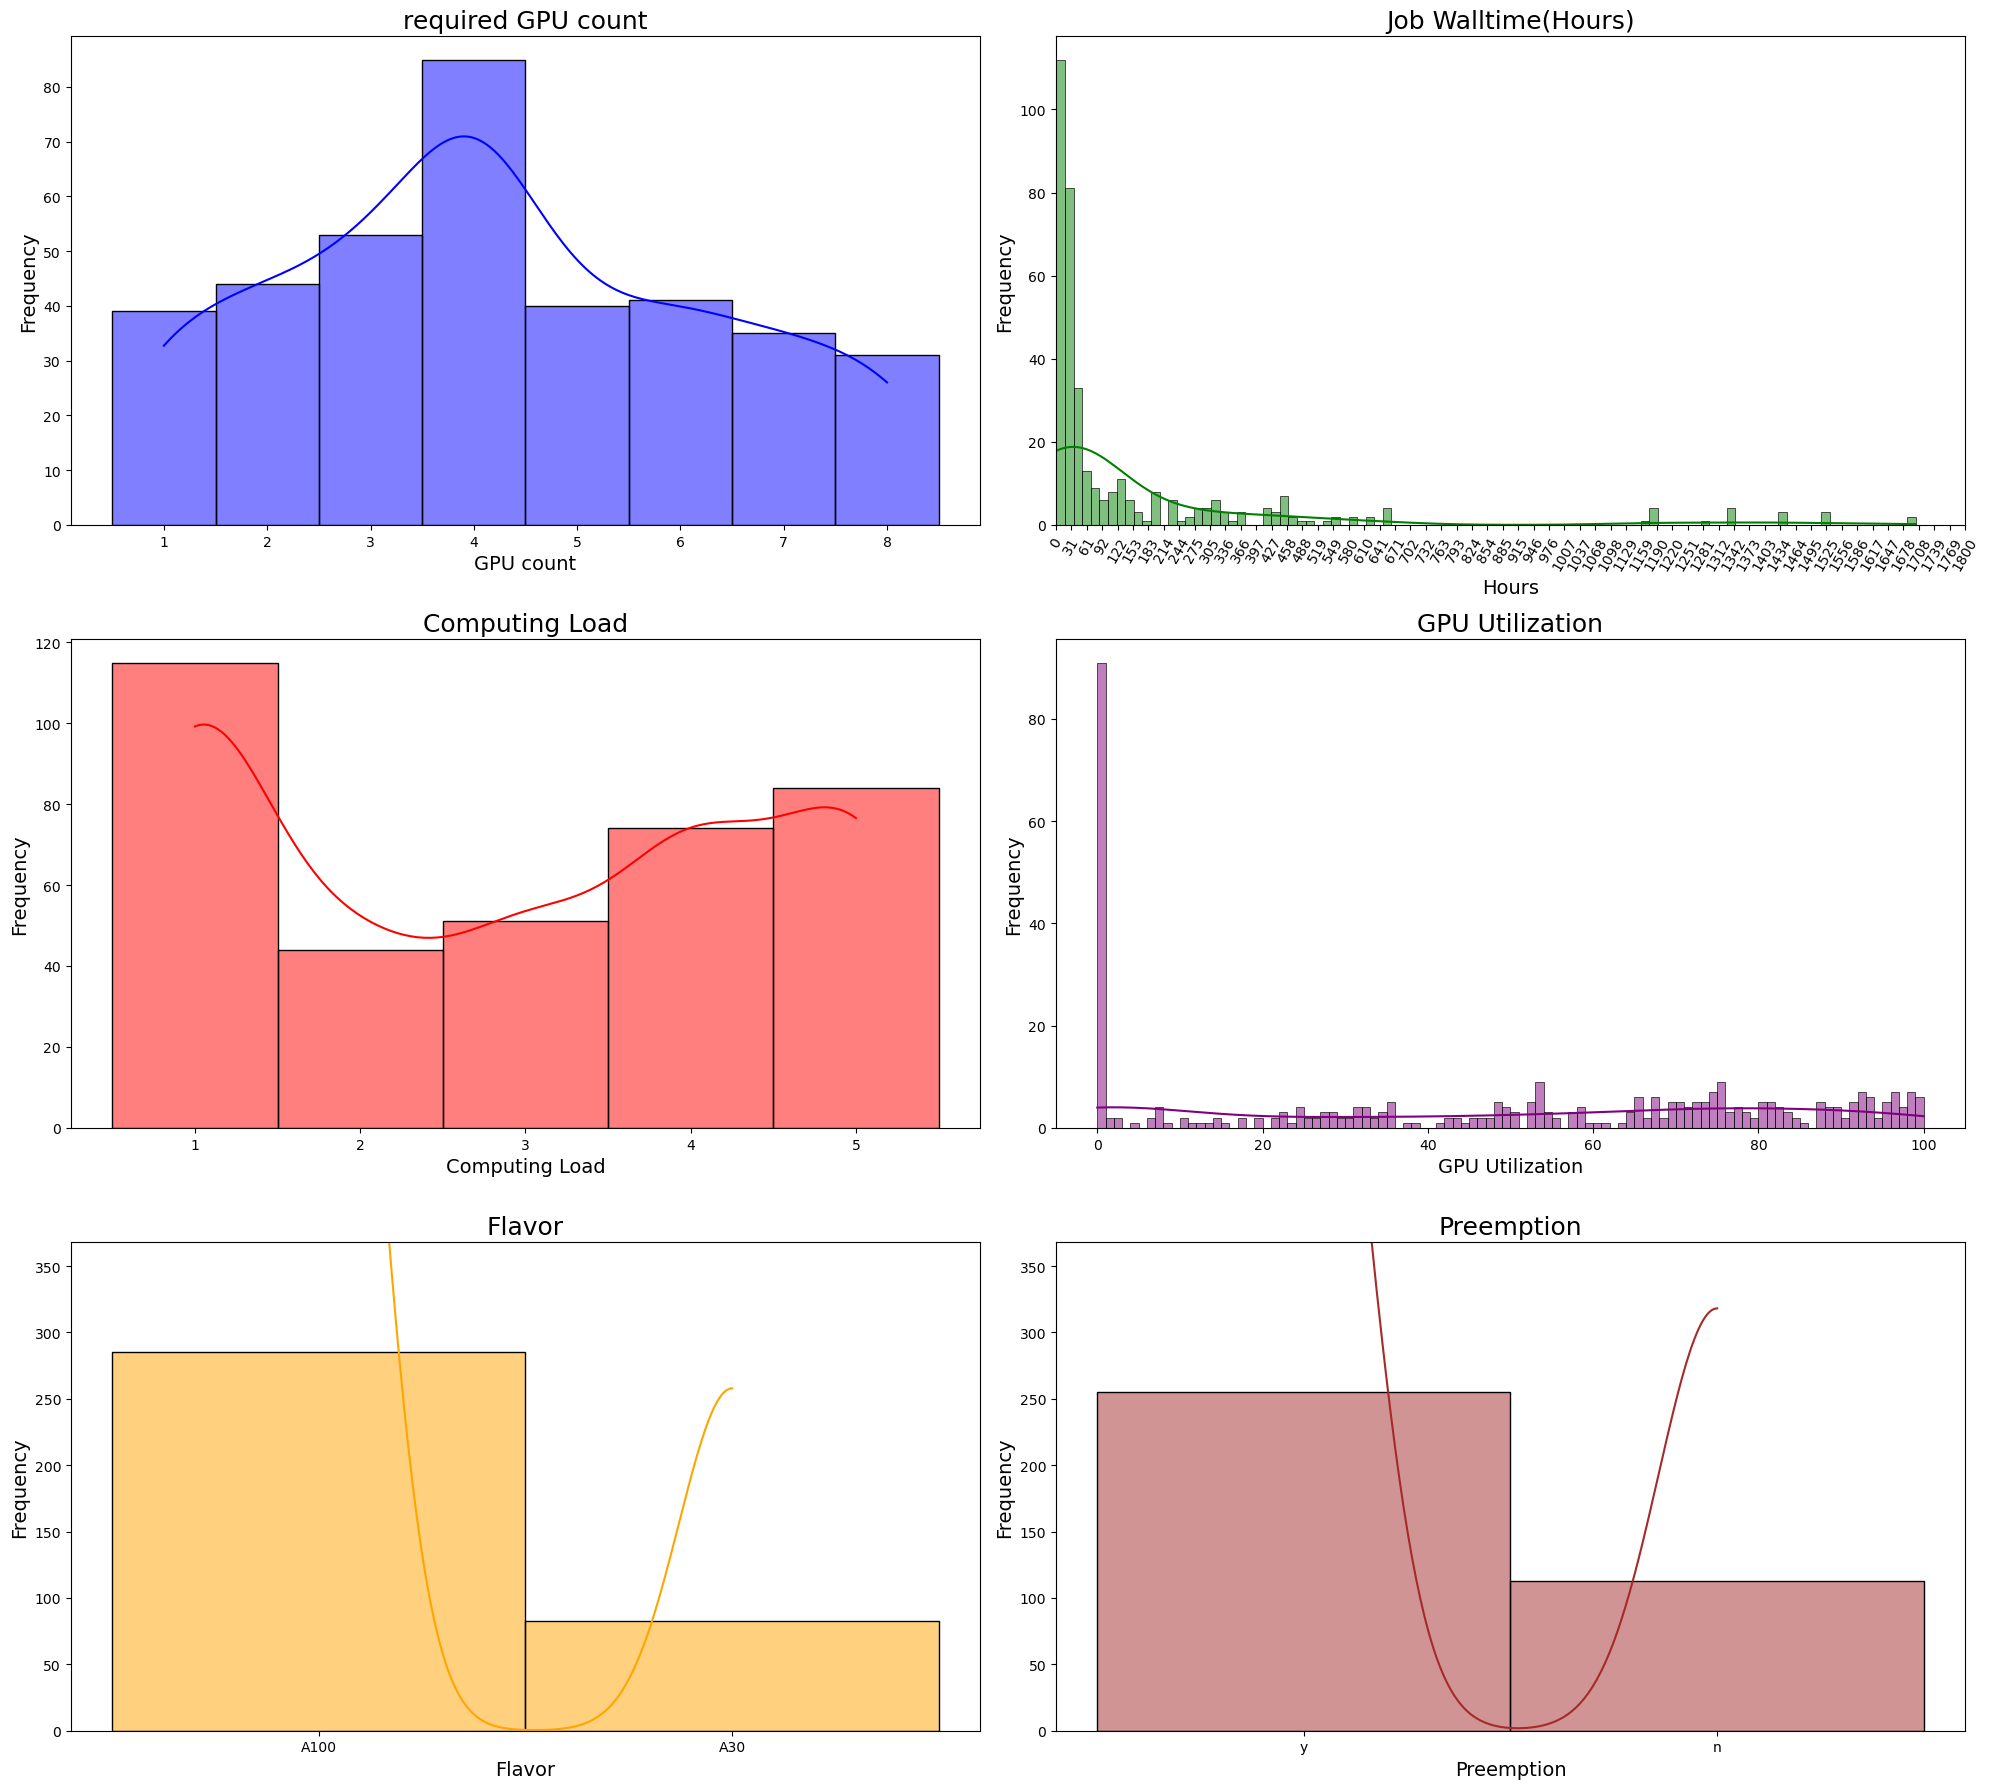

In [81]:
plot_histograms_(get_latest_csv_data('.'), 100)

In [26]:
plot_histograms_(get_csv_data('20240612_165412.csv'), 100)

FileNotFoundError: [Errno 2] No such file or directory: '20240612_165412.csv'

In [ ]:
folder_path = '.'  # Replace with your folder path
df = get_latest_csv_data(folder_path)
df

In [ ]:
df.describe()

In [ ]:
def plot_3d(data):
    # x, y, z 값 설정
    x = data['time_diff']
    y = data['count']
    z = data['gpu_utilization']
    
    # 그리드 데이터 생성
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')
    
    # 3D 플롯 설정
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 3D surface plot 생성
    surf = ax.plot_surface(xi, yi, zi, cmap='viridis')
    
    # 컬러 바 추가
    fig.colorbar(surf)
    
    # 레이블 설정
    ax.set_xlabel('Time Difference')
    ax.set_ylabel('Count')
    ax.set_zlabel('GPU Utilization')
    
    # 제목 설정
    ax.set_title('3D Surface Plot of time_diff, count, and gpu_utilization')
    
    # 그래프 표시
    plt.show()

In [ ]:
plot_3d(df)

In [ ]:
def plot_histograms(df, bin_count):
    fig, axs = plt.subplots(3, 2, figsize=(73, 60))
    
    # Plot histograms with KDE
    sns.histplot(df['count'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Count')
    
    sns.histplot(df['time_diff'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Job Walltime')
    
    sns.histplot(df['computing_load'], bins=bin_count, kde=True, ax=axs[1, 0], color='red')
    axs[1, 0].set_title('Computing Load')
    
    sns.histplot(df['gpu_utilization'], bins=bin_count, kde=True, ax=axs[1, 1], color='purple')
    axs[1, 1].set_title('GPU Utilization')

    sns.histplot(df['flavor'], bins=bin_count, kde=True, ax=axs[2, 0], color='orange')
    axs[2, 0].set_title('Flavor')
    
    sns.histplot(df['preemption'], bins=bin_count, kde=True, ax=axs[2, 1], color='brown')
    axs[2, 1].set_title('Preemption')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [ ]:
plot_histograms_(df, 1000)